# API do Spotify na Análise da Discografia de Harry Styles

A API do Spotify é uma interface poderosa que permite aos desenvolvedores acessar e interagir com os vastos recursos da plataforma de streaming musical Spotify. Com essa API, é possível integrar funcionalidades do Spotify em aplicativos, sites e serviços de terceiros, oferecendo uma experiência personalizada aos usuários.

### Principais Funcionalidades

1. **Autenticação**: A API utiliza o protocolo OAuth 2.0 para autenticação, permitindo que os usuários conectem suas contas do Spotify e autorizem aplicativos de terceiros a acessar seus dados.


2. **Busca de Músicas**: É possível buscar músicas, álbuns, artistas e playlists com facilidade. Os desenvolvedores podem implementar funcionalidades de busca personalizadas em seus aplicativos.


3. **Gerenciamento de Playlists**: A API permite criar, modificar e excluir playlists. Os usuários podem adicionar ou remover faixas de suas playlists, facilitando a personalização da experiência musical.



4. **Dados do Usuário**: A API oferece acesso a informações detalhadas sobre os usuários, como suas playlists, músicas salvas, e artistas favoritos, permitindo uma experiência mais rica e personalizada.


5. **Reprodução de Músicas**: É possível controlar a reprodução de músicas em dispositivos que têm o Spotify instalado, permitindo que aplicativos de terceiros interajam com a experiência de escuta do usuário.


6. **Informações sobre Músicas e Artistas**: A API fornece dados ricos sobre faixas, álbuns e artistas, incluindo descrições, popularidade, e estatísticas de reprodução, permitindo análises e insights aprofundados.


### Casos de Uso

- **Aplicativos de Recomendação Musical**: Desenvolvedores podem criar aplicativos que analisam o histórico de escuta dos usuários e sugerem novas músicas ou artistas com base em suas preferências.

  
- **Experiências de Eventos**: Integrar a API em eventos ao vivo para criar experiências interativas, como votação em tempo real de faixas a serem tocadas.


- **Ferramentas de Análise**: Desenvolvedores podem construir ferramentas para visualizar e analisar dados de escuta, ajudando artistas e produtores a entenderem melhor seu público.


Mais informações no link: https://developer.spotify.com/

In [ ]:
# Importação de bibliotecas
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import csv
import numpy as np
import seaborn as sns
from scipy.stats import norm, skew
import matplotlib.pyplot as plt

# Requisição na API
SPOTIPY_CLIENT_ID = 'YOUR SPOTIPY_CLIENT_ID'
SPOTIPY_CLIENT_SECRET = 'SPOTIPY_CLIENT_SECRET'

auth_manager = SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID, client_secret=SPOTIPY_CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

In [ ]:
# Identificador exclusivo do Harry Styles no Spotify
artist_id = '6KImCVD70vtIoJWnq6nGn3'

# Obtém as faixas mais populares do artista usando seu ID
top_music_harry = sp.artist_top_tracks(artist_id)['tracks']

# Verifica quantas faixas foram retornadas
len(top_music_harry)

# Inicializa uma lista vazia para armazenar os dados das faixas
lista_top_10 = list()

# Itera sobre as faixas mais populares do artista, obtendo informações de cada música
for i, music in enumerate(top_music_harry):
    # Extrai o nome do artista da faixa
    nome_artista = music['artists'][0]['name']
    # Extrai o ID do artista
    id_artista = music['artists'][0]['id']
    # Extrai o nome do álbum da faixa
    album = music['album']['name']
    # Extrai o ID do álbum
    id_album = music['album']['id']
    # Extrai a data de lançamento do álbum
    lancamento = music['album']['release_date']
    # Extrai o nome da música
    musica = music['name']
    # Extrai o ID da música
    id_musica = music['id']
    # Extrai a popularidade da música
    popularidade = music['popularity']

    # Verifica se a música pode ser reproduzida
    if music['is_playable'] == True:
        # Se for reproduzível, obtém a URL da prévia
        preview_url = music['preview_url']
    else:
        # Se não for reproduzível, define a URL de prévia como uma lista vazia
        preview_url = []

    # Extrai a URL da imagem do álbum
    imagem = music['album']['images'][0]['url']

    # Adiciona as informações da música como uma tupla na lista
    lista_top_10.append((nome_artista, id_artista, album, id_album, lancamento, musica, id_musica, popularidade, preview_url, imagem))

# Cria um DataFrame do pandas com os dados das faixas, especificando os nomes das colunas
df_top_10 = pd.DataFrame(lista_top_10, index=None, columns=('artista', 'id_artista', 'album', 'id_album', 'lancamento', 'musica', 'id_musica', 'popularidade', 'preview_url', 'imagem'))

# Exibe o DataFrame com os dados das faixas
df_top_10

# Salva o DataFrame em um arquivo CSV
df_top_10.to_csv('top_10.csv', index=False, encoding='utf-8', sep=',')

In [ ]:
# Obtém uma lista de artistas relacionados a partir do ID do artista especificado
artistas_relacionados = sp.artist_related_artists('6KImCVD70vtIoJWnq6nGn3')['artists']

# Cria uma lista vazia para armazenar as informações dos artistas relacionados
lista_artistas_relacionados = list()

# Itera sobre cada artista relacionado
for artista_relacionado in artistas_relacionados:
  # Extrai o nome do artista
  artista = artista_relacionado['name']
  # Extrai o ID do artista
  id_artista = artista_relacionado['id']
  # Extrai a URL do perfil do artista no Spotify
  perfil = artista_relacionado['external_urls']['spotify']
  # Extrai o número total de seguidores do artista
  seguidores = artista_relacionado['followers']['total']
  # Extrai o índice de popularidade do artista
  popularidade = artista_relacionado['popularity']
  # Extrai a lista de gêneros associados ao artista
  generos = artista_relacionado['genres']
  # Extrai a URL da imagem principal do artista
  imagem = artista_relacionado['images'][0]['url']

  # Adiciona os dados do artista na lista como uma tupla
  lista_artistas_relacionados.append((artista, id_artista, perfil, seguidores, popularidade, generos, imagem))

# Converte a lista de artistas relacionados em um DataFrame do Pandas
df_art_relacionados = pd.DataFrame(lista_artistas_relacionados, index=None, columns=('artista', 'id_artista', 'perfil', 'seguidores', 'popularidade', 'generos', 'imagem'))

# Ordena o DataFrame por número de seguidores em ordem decrescente
df_art_relacionados.sort_values(by='seguidores', ascending=False)

# Salva o DataFrame em um arquivo CSV, sem incluir o índice, com codificação UTF-8 e separador de vírgula
df_art_relacionados.to_csv('artistas_relacionados.csv', index=False, encoding='utf-8', sep=',')

In [ ]:
# URL da playlist do Harry Styles
playlist_url = 'https://open.spotify.com/playlist/6cuMWkGvlB4kBOuQKYWBwU'
harry_playlist = sp.playlist_tracks(playlist_url)

# Extrair todas as faixas da playlist
tracks = harry_playlist['items']
while harry_playlist['next']:
    harry_playlist = sp.next(harry_playlist)
    tracks.extend(harry_playlist['items'])

# Escrever informações no CSV com codificação 'utf-8-sig'
with open('musicas.csv', mode='w', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow([
        'Nome da música',
        'Nome do artista',
        'Álbum',
        'Data de lançamento do álbum',
        'Qtd músicas no álbum',
        'Duração em min',
        'Conteúdo explícito',
        'Preview da música',
        'Energia',
        'Ao vivo',
        'Acústica',
        'Instrumental',
        'Dançabilidade',
        'Volume',
        'Década'
    ])

    for musicas in tracks:
        # Obtém o ID da música e as características de áudio
        track_id = musicas['track']['id']
        audio_features = sp.audio_features([track_id])[0]

        # Extrair detalhes e características da música
        nomes_artistas = ', '.join([artista['name'] for artista in musicas['track']['artists']])
        energia = audio_features['energy']
        vivacidade = audio_features['liveness']
        acustica = audio_features['acousticness']
        instrumental = audio_features['instrumentalness']
        danca = audio_features['danceability']
        volume = audio_features['loudness']

        # Calcular a década com base na data de lançamento
        ano_lancamento = int(musicas['track']['album']['release_date'][:4])
        decada = (ano_lancamento // 10) * 10

        # Escrever dados no CSV
        writer.writerow([
            musicas['track']['name'],
            nomes_artistas,
            musicas['track']['album']['name'],
            musicas['track']['album']['release_date'],
            musicas['track']['album']['total_tracks'],
            musicas['track']['duration_ms'] / 60000,
            musicas['track']['explicit'],
            musicas['track']['preview_url'],
            energia,
            vivacidade,
            acustica,
            instrumental,
            danca,
            volume,
            decada
        ])

# Carregar e exibir os dados do CSV usando pandas
df = pd.read_csv('musicas.csv', encoding='utf-8-sig')
print('Número de músicas:', len(df.index))

Número de músicas: 35


,Nome da música,Nome do artista,Álbum,Data de lançamento do álbum,Qtd músicas no álbum,Duração em min,Conteúdo explícito,Preview da música,Energia,Ao vivo,Acústica,Instrumental,Dançabilidade,Volume,Década
0,Music For a Sushi Restaurant,Harry Styles,Harry's House,2022-05-20,13,3.230217,False,https://p.scdn.co/mp3-preview/3badb04493ee555f...,0.715,0.1070,0.258000,0.056800,0.720,-4.652,2020
1,Late Night Talking,Harry Styles,Harry's House,2022-05-20,13,2.965900,False,https://p.scdn.co/mp3-preview/50f056e2ab4a1bef...,0.728,0.1060,0.298000,0.000000,0.714,-4.595,2020
2,Grapejuice,Harry Styles,Harry's House,2022-05-20,13,3.199300,False,https://p.scdn.co/mp3-preview/a0d663b6bde75efc...,0.721,0.2040,0.357000,0.143000,0.645,-4.394,2020
3,As It Was,Harry Styles,Harry's House,2022-05-20,13,2.788383,False,https://p.scdn.co/mp3-preview/c43dd07043b29e80...,0.731,0.3110,0.342000,0.001010,0.520,-5.338,2020
4,Daylight,Harry Styles,Harry's House,2022-05-20,13,2.742217,False,https://p.scdn.co/mp3-preview/81ea9803f8898828...,0.445,0.1750,0.484000,0.001440,0.686,-7.189,2020
5,Little Freak,Harry Styles,Harry's House,2022-05-20,13,3.369717,False,https://p.scdn.co/mp3-preview/38dfa398e1e1a99d...,0.535,0.0954,0.719000,0.000143,0.559,-7.723,2020
6,Matilda,Harry Styles,Harry's House,2022-05-20,13,4.099400,False,https://p.scdn.co/mp3-preview/f2b98f3f2c381340...,0.294,0.0966,0.896000,0.000020,0.507,-10.000,2020
7,Cinema,Harry Styles,Harry's House,2022-05-20,13,4.058450,False,https://p.scdn.co/mp3-preview/0f977ab13aa73318...,0.644,0.0944,0.354000,0.051100,0.829,-7.696,2020
8,Daydreaming,Harry Styles,Harry's House,2022-05-20,13,3.122367,False,https://p.scdn.co/mp3-preview/6ed66e562f567da0...,0.811,0.1310,0.311000,0.015200,0.707,-5.298,2020
9,Keep Driving,Harry Styles,Harry's House,2022-05-20,13,2.337350,False,https://p.scdn.co/mp3-preview/41759e42f6c8d045...,0.479,0.1820,0.321000,0.001560,0.721,-9.669,2020


In [ ]:
# URL da playlist do Harry Styles
playlist_url = 'https://open.spotify.com/playlist/6cuMWkGvlB4kBOuQKYWBwU'
harry_playlist = sp.playlist_tracks(playlist_url)

# Extrair todas as faixas da playlist
tracks = harry_playlist['items']
while harry_playlist['next']:
    harry_playlist = sp.next(harry_playlist)
    tracks.extend(harry_playlist['items'])

# Lista para armazenar dados em formato longo
data = []

# Processar cada faixa e suas características
for musicas in tracks:
    # Obtém o ID da música e as características de áudio
    track_id = musicas['track']['id']
    audio_features = sp.audio_features([track_id])[0]

    # Extrair detalhes e características da música
    nomes_artistas = ', '.join([artista['name'] for artista in musicas['track']['artists']])
    energia = audio_features['energy']
    vivacidade = audio_features['liveness']
    acustica = audio_features['acousticness']
    instrumental = audio_features['instrumentalness']
    danca = audio_features['danceability']
    volume = audio_features['loudness']

    # Adicionar dados no formato longo
    for feature, value in [
        ('Energia', energia),
        ('Ao vivo', vivacidade),
        ('Acústica', acustica),
        ('Instrumental', instrumental),
        ('Dançabilidade', danca),
        ('Volume', volume),
    ]:
        data.append({
            'Nome da música': musicas['track']['name'],
            'Feature': feature,
            'Valor': value
        })

# Salvar em CSV com pandas
df = pd.DataFrame(data)
df.to_csv('musicas_features_long_format.csv', index=False, encoding='utf-8-sig', sep=',')

# Exibir o DataFrame
df

,Nome da música,Feature,Valor
0,Music For a Sushi Restaurant,Energia,0.7150
1,Music For a Sushi Restaurant,Ao vivo,0.1070
2,Music For a Sushi Restaurant,Acústica,0.2580
3,Music For a Sushi Restaurant,Instrumental,0.0568
4,Music For a Sushi Restaurant,Dançabilidade,0.7200
...,...,...,...
205,From the Dining Table,Ao vivo,0.1130
206,From the Dining Table,Acústica,0.8040
207,From the Dining Table,Instrumental,0.0518
208,From the Dining Table,Dançabilidade,0.6710


C:\Users\Ryan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


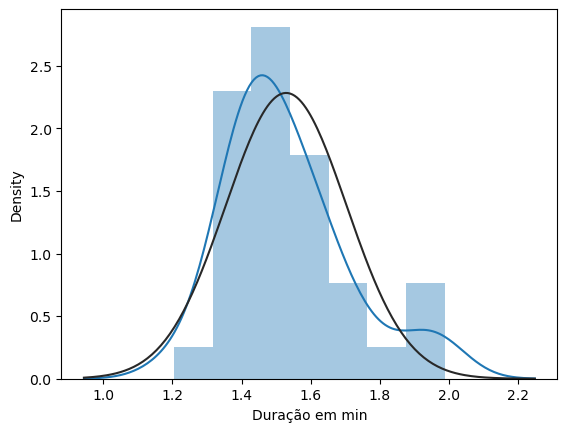

In [ ]:
# Aplica a transformação logarítmica (log(1 + x)) à coluna 'Duração em min' para reduzir a assimetria dos dados
df['Duração em min'] = np.log1p(df['Duração em min'])

# Cria uma distribuição da coluna 'Duração em min' transformada, ajustando-a a uma distribuição normal
sns.distplot(df['Duração em min'], fit=norm)

# Exibe o gráfico de distribuição
plt.show()


Este gráfico mostra a distribuição da coluna "Duração em min" após a aplicação de uma transformação logarítmica (log(1 + x)), que é uma técnica comum para reduzir a assimetria em dados com valores muito altos. Aqui, o objetivo é aproximar a distribuição da duração das músicas de uma distribuição normal, o que ajuda na análise estatística.

O gráfico de densidade (a linha preta) representa a distribuição dos dados ajustada a uma curva normal, enquanto o histograma em azul exibe a frequência dos valores transformados de "Duração em min". A transformação logarítmica ajuda a centralizar os dados, reduzindo a dispersão de valores, especialmente se houvesse uma cauda longa à direita antes da transformação.



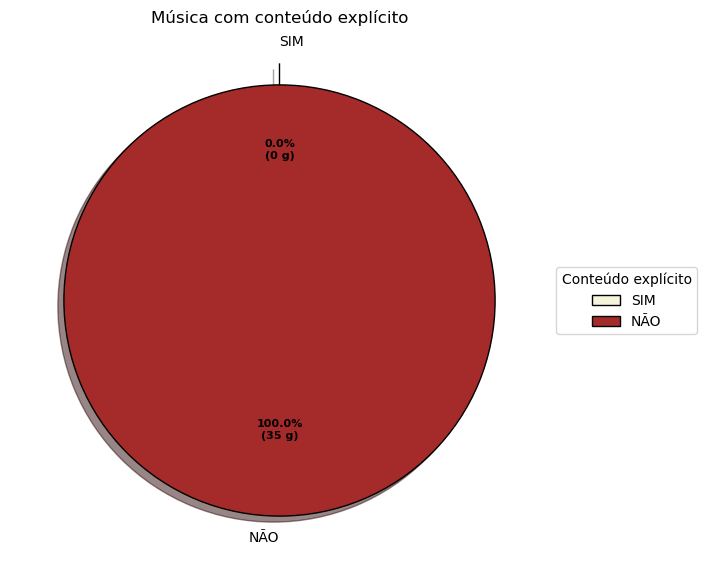

In [ ]:
# dados
legenda = ['SIM', 'NÃO']
data = [(df['Conteúdo explícito'] == True).sum(), (df['Conteúdo explícito'] == False).sum()]

# costumização do gráfico de pizza
explode = (0.1, 0.0)
colors = ("beige", "brown")
wp = { 'linewidth' : 1, 'edgecolor' : "black" }
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
                                  autopct = lambda pct: func(pct, data),
                                  explode = explode,
                                  labels = legenda,
                                  shadow = True,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))
ax.legend(wedges, legenda,
          title ="Conteúdo explícito",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Música com conteúdo explícito")

plt.show()

Em toda a sua discografia, Harry Styles optou por não usar temáticas explícitas e palavras que tenham essa conotação.

# Análise de Features na Discografia de Harry Styles

Toda a discografia foi analisada em relação a volume, dançabilidade, instrumentalidade, formato ao vivo e energia.

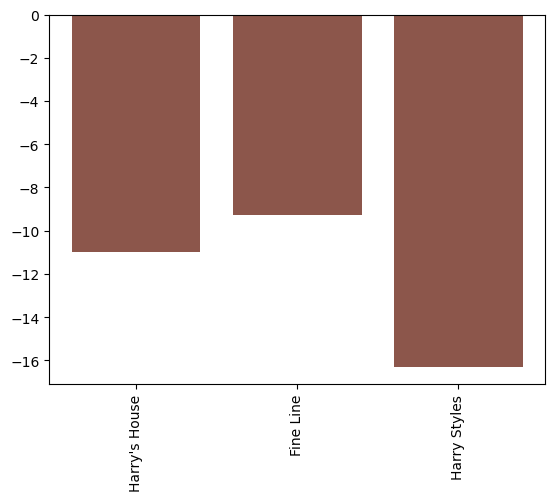

In [ ]:
# Definir a largura da barra para 0.8 para um espaço mais visível entre elas
plt.bar(df['Álbum'], df['Volume'], width=0.8, color="C5")
plt.xticks(rotation=90)  # Gira os rótulos do eixo x para melhor visualização, se necessário
plt.show()

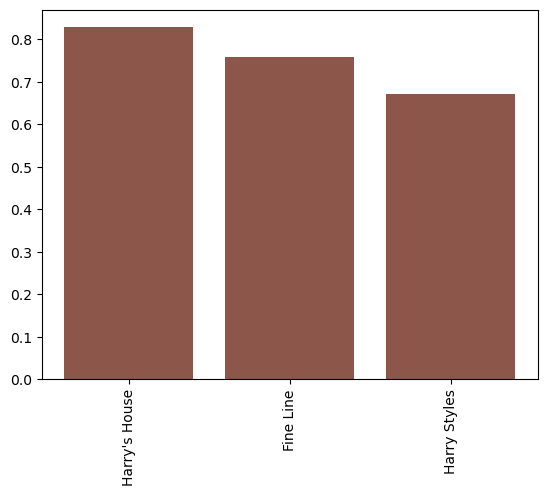

In [ ]:
# Definir a largura da barra para 0.8 para um espaço mais visível entre elas
plt.bar(df['Álbum'], df['Dançabilidade'], width=0.8, color="C5")
plt.xticks(rotation=90)  # Gira os rótulos do eixo x para melhor visualização, se necessário
plt.show()

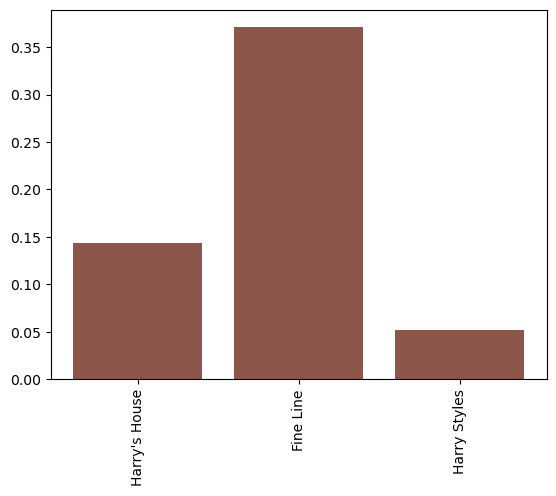

In [ ]:
# Definir a largura da barra para 0.8 para um espaço mais visível entre elas
plt.bar(df['Álbum'], df['Instrumental'], width=0.8, color="C5")
plt.xticks(rotation=90)  # Gira os rótulos do eixo x para melhor visualização, se necessário
plt.show()

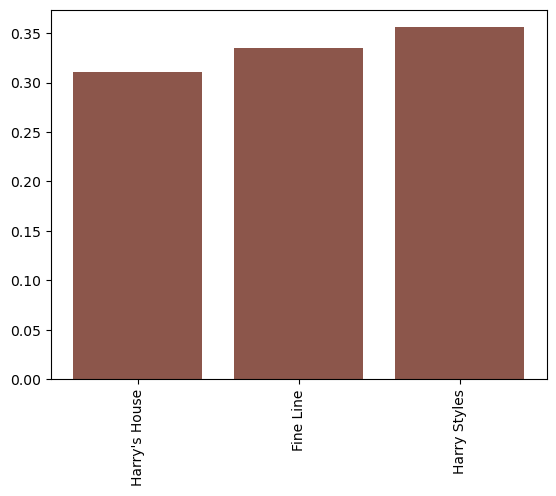

In [ ]:
# Definir a largura da barra para 0.8 para um espaço mais visível entre elas
plt.bar(df['Álbum'], df['Ao vivo'], width=0.8, color="C5")
plt.xticks(rotation=90)  # Gira os rótulos do eixo x para melhor visualização, se necessário
plt.show()

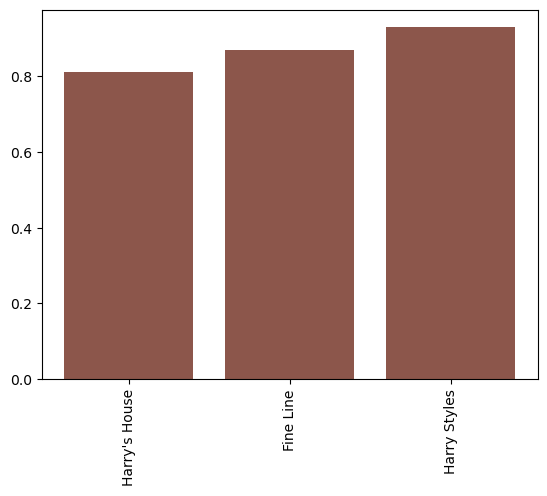

In [ ]:
# Definir a largura da barra para 0.8 para um espaço mais visível entre elas
plt.bar(df['Álbum'], df['Energia'], width=0.8, color="C5")
plt.xticks(rotation=90)  # Gira os rótulos do eixo x para melhor visualização, se necessário
plt.show()

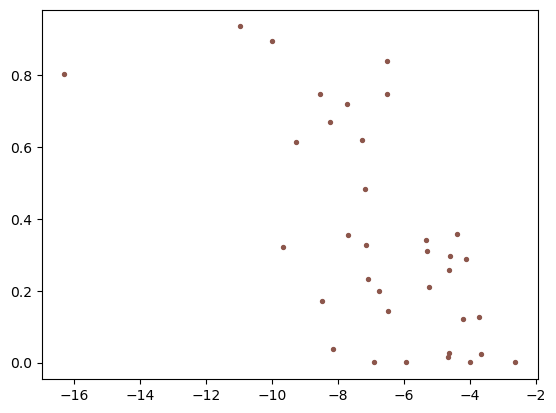

In [ ]:
plt.scatter(df['Volume'], df['Acústica'], 8, color = "C5" )
plt.show()

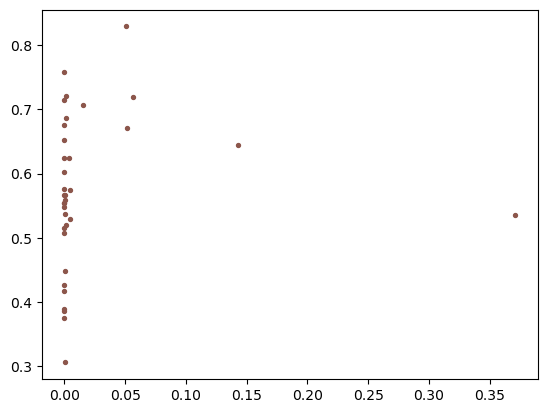

In [ ]:
plt.scatter(df['Instrumental'], df['Dançabilidade'], 8, color = "C5" )
plt.show()

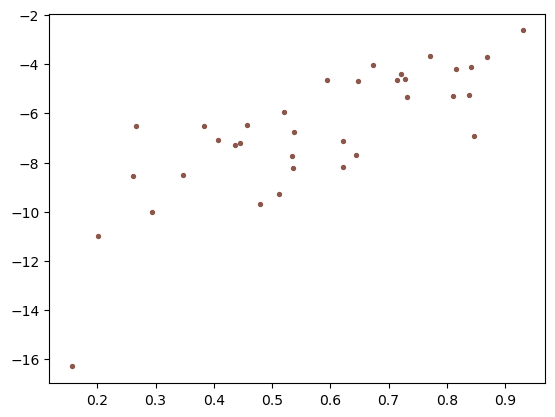

In [ ]:
plt.scatter(df['Energia'], df['Volume'], 8, color = "C5" )
plt.show()

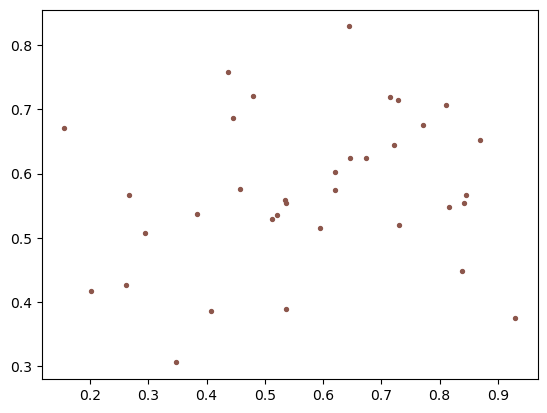

In [ ]:
plt.scatter(df['Energia'], df['Dançabilidade'], 8, color = "C5" )
plt.show()